# Simulating Microlensing graphs

$I_{obs} \left( t \right) = I_{s0} + I_{A} + N \left( \sigma^{2} \right) $

$I_{s0}$ is baseline, $I_{A}$ is lens magnification


In [0]:
import numpy as np
from matplotlib import pyplot as plt

## Baseline

$I_{s0} = m_{A} \mbox{sin} \left( \frac{2 \pi t}{T} + \phi \right) $

where

$m_{A}$ is amplitude

$T$ is period

$\phi$ is phase


In [0]:
def intensity_baseline(period, amplitude, phase, t):
  return amplitude * np.sin((2 * np.pi * t / period) + phase)

In [0]:
is0_ex1 = [intensity_baseline(5, 0.00005, 0, x) for x in range(100)]

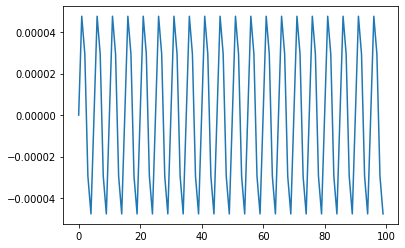

In [26]:
plt.plot(is0_ex1)

## Lens Magnification

$A \left( t \right) = \frac{\left[ u(t) \right]^{2} + 2}{u(t) + \sqrt{[u(t)]^2 + 4}} $

$u(t) = u_0 + \left| \frac{t-t_0}{T_E} \right|$

where

$u_0$ is minimum impact parameter

$T_E$ and $t_0$ determins the radius and shift in time

In [0]:
def lens_magnification(u0, t0, tE, t):
  ut = u0 + np.abs((t - t0) / tE)
  return (ut ** 2 + 2) / (ut * np.sqrt(ut**2 + 4))

In [0]:
iA_ex1 = [lens_magnification(10, 50, 2, x) for x in range(100)]

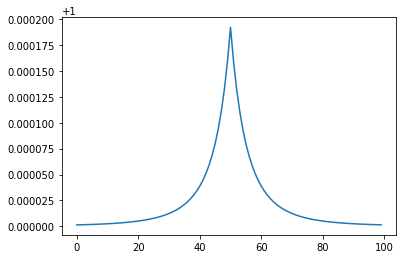

In [29]:
plt.plot(iA_ex1)

## Putting all together

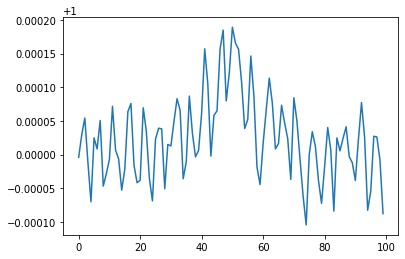

In [30]:
iobs_ex1 = np.array(iA_ex1) + np.array(is0_ex1) + np.random.normal(scale=0.00003, size=100)
plt.plot(iobs_ex1)

Perhaps its a good idea to normalize the graph so that it will have mean=0 and stdev=1

In [0]:
iobs_ex1_normalized = iobs_ex1 / np.linalg.norm(iobs_ex1)

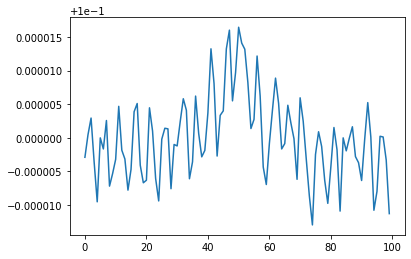

In [32]:
plt.plot(iobs_ex1_normalized)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def intensity_baseline(period, amplitude, phase, t):
  return amplitude * np.sin((2 * np.pi * t / period) + phase)


def lens_magnification(u0, t0, tE, t):
  ut = u0 + np.abs((t - t0) / tE)
  return (ut ** 2 + 2) / (ut * np.sqrt(ut**2 + 4))


def simulate_microlensing(baseline_period, baseline_amplitude, baseline_phase,
                          lens_min_impact, lens_shift, lens_radius, noise, t_range=range(100)):
  i_s0 = np.array([intensity_baseline(baseline_period, baseline_amplitude, baseline_phase, t) for t in t_range])
  i_A = np.array([lens_magnification(lens_min_impact, lens_shift, lens_radius, t) for t in t_range])
  n = np.random.normal(scale=noise, size=len(t_range))
  return i_s0 + i_A + n

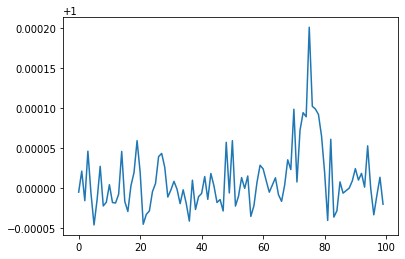

In [34]:
plt.plot(simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100)))

# Fitting sampled data into ARIMA

Installing pyflux (library for time series analysis). Will be using ARIMA class for fitting the sampled data into ARIMA model and make prediction.

In [35]:
pip install pyflux 

In [0]:
import pyflux as pf

Creating the model

In [0]:
data = simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100))

model = pf.ARIMA(data=data, ar=10, integ=1, ma=10, target='microlense', family=pf.Normal())

Fitting the data and getting the summary

In [38]:
fit = model.fit("MLE")
fit.summary()

Normal ARIMA(10,1,10)                                                                                     
======================================================= ==================================================
Dependent Variable: Differenced Series                  Method: MLE                                       
Start Date: 10                                          Log Likelihood: 772.7007                          
End Date: 99                                            AIC: -1501.4013                                   
Number of observations: 89                              BIC: -1446.6513                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0        0.0        0.0761   0.9394   (-0.0 | 0.0)             
AR(1)                                

Plotting the fit-

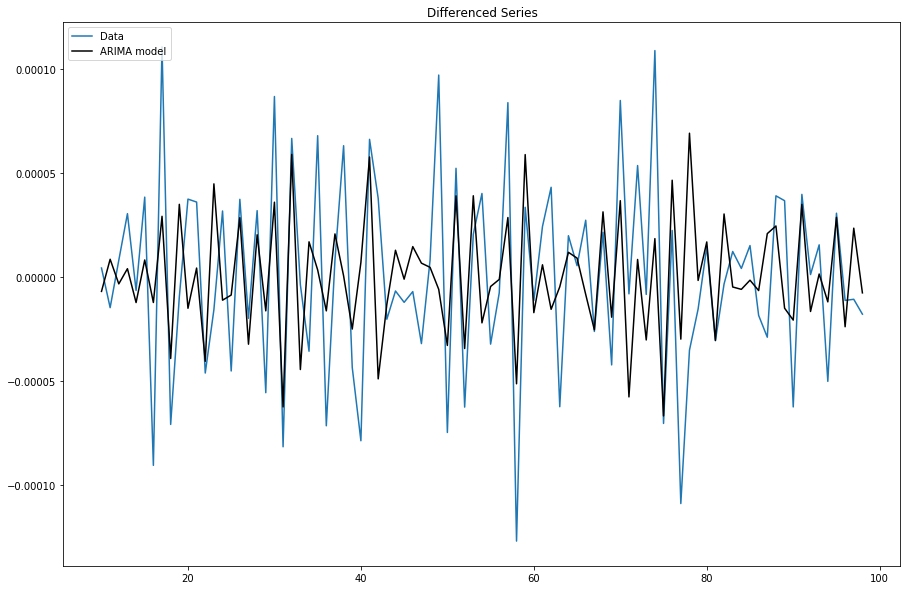

In [39]:
model.plot_fit(figsize=(15,10))

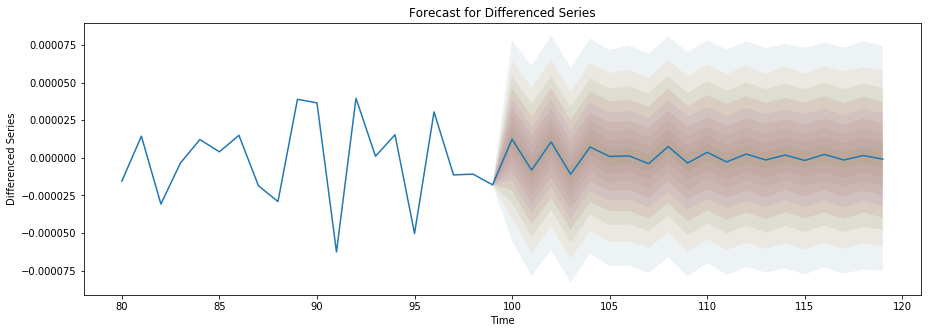

In [40]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))

In [41]:
np.array(model.predict(h=70)['Differenced Series'])

array([ 1.23045576e-05, -8.19069427e-06,  1.04813994e-05, -1.09777574e-05,
        7.11700379e-06,  8.26877915e-07,  1.22604835e-06, -3.96925225e-06,
        7.43234593e-06, -3.53466527e-06,  3.62855538e-06, -2.77406119e-06,
        2.42838765e-06, -1.47569143e-06,  1.77491090e-06, -1.82511418e-06,
        2.21123202e-06, -1.50752917e-06,  1.48390679e-06, -9.66219048e-07,
        1.20895246e-06, -7.08750082e-07,  1.05137979e-06, -6.28483120e-07,
        9.64633510e-07, -4.67194576e-07,  7.63492845e-07, -3.03538545e-07,
        6.51521990e-07, -2.18149918e-07,  5.75711534e-07, -1.51498481e-07,
        5.09068279e-07, -8.16365979e-08,  4.41274013e-07, -2.38393578e-08,
        3.95101539e-07,  1.52135475e-08,  3.59552124e-07,  4.84366659e-08,
        3.28452547e-07,  7.74950746e-08,  3.02123825e-07,  1.00512854e-07,
        2.82218484e-07,  1.18129979e-07,  2.66166620e-07,  1.32874884e-07,
        2.52697510e-07,  1.45063565e-07,  2.41777464e-07,  1.54767789e-07,
        2.33143541e-07,  

In [42]:
model = pf.ARIMA(data=data, ar=4, integ=1, ma=4, target='microlense', family=pf.Normal())
model.fit("MLE")

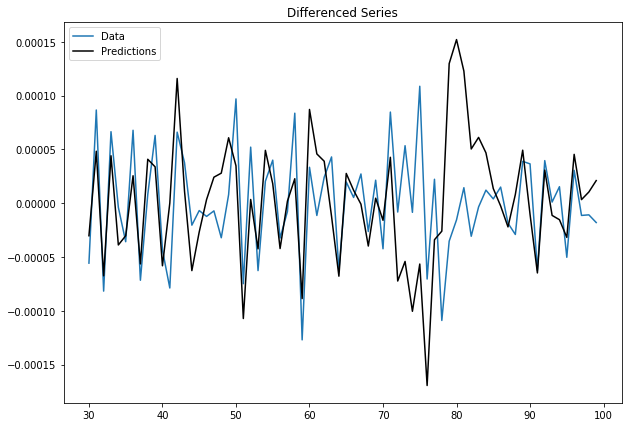

In [43]:
model.plot_predict_is(h=70)

data_with_peak = simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100))

In [44]:
model = pf.ARIMA(data=data_with_peak, ar=4, integ=1, ma=4, target='microlense', family=pf.t())
model.fit("MLE")

NameError: ignored

In [0]:
model.plot_predict_is(h=70)

In [0]:
plt.plot(data_with_peak)

# Generate Train and Test Data

In [0]:
def simulate_noevent(baseline_period, baseline_amplitude, baseline_phase, noise, t_range=range(100)):
    i_s0 = np.array([intensity_baseline(baseline_period, baseline_amplitude, baseline_phase, t) for t in t_range])
    n = np.random.normal(scale=noise, size=len(t_range))
    return i_s0 + n

In [0]:
from tqdm import tqdm

def generate_dataset(num_dataset):
    X_out = np.zeros((num_dataset, 100, 2))
    y_out = np.zeros((num_dataset, 100))

    for x in tqdm(range(num_dataset)):
        seq=None
        ys=None
        if np.random.uniform() > 0.5:
            peak_t = int(np.random.uniform(low=50, high=80))
            seq = simulate_microlensing(baseline_period=2, 
                                        baseline_amplitude=0.00001, 
                                        baseline_phase=0,
                                        lens_min_impact=10, 
                                        lens_shift=peak_t, 
                                        lens_radius=1, 
                                        noise=0.00003, 
                                        t_range=range(100))
            seq_avg = np.mean(seq[:30])
            seq_std = np.std(seq[:30])
            seq = (seq - seq_avg) / seq_std
            ys = np.zeros(100)
            ys[peak_t-10:peak_t] = 1
        else:
            seq = simulate_noevent(baseline_period=2, 
                                baseline_amplitude=0.00001,
                                baseline_phase=0,
                                noise=0.00003,
                                t_range=range(100))
            seq_avg = np.mean(seq[:30])
            seq_std = np.std(seq[:30])
            seq = (seq - seq_avg) / seq_std
            ys = np.zeros(100)
        model=pf.ARIMA(data=seq,ar=4, integ=1, ma=4, family=pf.Normal())
        model.fit('MLE')
        hs = model.predict_is(h=70)
        seq_sim = np.concatenate((seq[:30], hs['Differenced Series']))
        X_out[x,:,0] = seq
        X_out[x,:,1] = seq_sim
        y_out[x] = ys
    
    return X_out, y_out

In [47]:
np.random.seed(420)
X_train, y_train = generate_dataset(100)

100%|██████████| 100/100 [04:06<00:00,  2.49s/it]


In [48]:
np.random.seed(520)
X_test, y_test = generate_dataset(10)

100%|██████████| 10/10 [00:24<00:00,  2.49s/it]


# Injecting the residuals into LSTM 

Building the LSTM model

In [49]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [50]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf
from tensorflow.keras import layers

In [0]:
# Initialising the RNN
rnn_lstm = tf.keras.Sequential()

In [53]:
# Adding the LSTM layers and some Dropout regularisation

# Adding the first layer
rnn_lstm.add(layers.LSTM(units=300, return_sequences=True, input_shape=(None, 2)))
rnn_lstm.add(layers.Dropout(0.1))

# Output layer
rnn_lstm.add(layers.Dense(units=1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [54]:
# Compiling the RNN
rnn_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc', f1_m])
rnn_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 300)         363600    
_________________________________________________________________
dropout (Dropout)            (None, None, 300)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           301       
Total params: 363,901
Trainable params: 363,901
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Fitting the RNN to training set
rnn_lstm.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 100 samples, validate on 10 samples
Epoch 1/10


InvalidArgumentError: ignored

In [0]:
rnn_lstm.evaluate(X_test, y_test)

In [0]:
sum(sum(y_test)) / 1000

In [0]:
y_pred=rnn_lstm.predict_proba(X_test)

In [0]:
plt.plot(y_pred[4][30:])

In [0]:
plt.plot(X_test[4,:,0][30:])